descriptive statistics (including confidence interval)

and distributions,

data transformation,

missing data (how to handle),

outlier detection (how to detect and handle).

For outlier detection both statistical tests and also visual investigations.

# descriptive statistics

Introduction
Descriptive Statistics is the building block of data science. Advanced analytics is often incomplete without analyzing descriptive statistics of the key metrics. In simple terms, descriptive statistics can be defined as the measures that summarize a given data, and these measures can be broken down further into the measures of central tendency and the measures of dispersion.

Measures of central tendency include mean, median, and the mode, while the measures of variability include standard deviation, variance, and the interquartile range. In this guide, you will learn how to compute these measures of descriptive statistics and use them to interpret the data.

We will cover the topics given below:

Mean

Median

Mode

Standard Deviation

Variance

Interquartile Range

Skewness

We will begin by loading the dataset to be used in this guide.

A large number of methods collectively compute descriptive statistics and other related operations on DataFrame. Most of these are aggregations like sum(), mean(), but some of them, like sumsum(), produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, ...}, but the axis can be specified by name or integer

DataFrame − “index” (axis=0, default), “columns” (axis=1)

In [81]:
import pandas as pd

import numpy as np

path='/home/sajid/Downloads/DB01_gaming_video_quality.xlsx'

Let us create a DataFrame and use this object throughout for all the operations.

In [82]:
df=pd.read_excel(path)

In [83]:
# Additonal setup for print and ignoring unnecessary warnings
pd.set_option('display.float_format', str)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [84]:
# Return the first n rows.
df.head(n=5)

,ID,PID,Game,Study,Game_group,Condition,Condition_params,Resolution,Framerate,Bitrate,VQ,VF,VU,VD,AC,Age,Gender,Expertise,Monitor
0,1,1,Game1,1,Game1_Game2_Game3,1,480_30_300,480,30,300,1.4,1.3,1.6,5.7,0,21,Male,4,Desktop
1,2,1,Game2,1,Game1_Game2_Game3,2,480_30_300,480,30,300,1.4,1.6,4.9,5.6,0,21,Male,4,Desktop
2,3,1,Game3,1,Game1_Game2_Game3,3,480_30_300,480,30,300,1.1,1.6,2.6,5.2,0,21,Male,4,Desktop
3,4,1,Game2,1,Game1_Game2_Game3,4,480_30_1000,480,30,1000,3.2,3.4,4.5,5.4,0,21,Male,4,Desktop
4,5,1,Game3,1,Game1_Game2_Game3,5,480_30_1000,480,30,1000,3.1,2.8,2.9,5.9,0,21,Male,4,Desktop


# Measures of Central Tendency

Measures of central tendency describe the center of the data, and are often represented by the mean, the median, and the mode.

## Mean

Mean represents the arithmetic average of the data. The line of code below prints the mean of the numerical variables in the data. 

In [85]:
pd.option_context('display.float_format', '{:,.5f}'.format)

In [86]:
df.mean()

ID                             1656.5
PID                              23.5
Study              1.4782608695652173
Condition                        36.5
Condition_params                  inf
Resolution                      760.0
Framerate                        45.0
Bitrate            10691.666666666666
VQ                 3.8393115942029055
VF                  4.150724637681164
VU                 3.8764492753623263
VD                  4.954317632850236
AC                 0.4628623188405797
Age                24.347826086956523
Expertise           3.152173913043478
dtype: float64

It is also possible to calculate the mean of a particular variable in a data, as shown below, where we calculate the mean of the variables 'Age' and 'Income'.

In [87]:
print(df.loc[:,'Age'].mean())
print(df.loc[:,'Expertise'].mean()) 

24.347826086956523
3.152173913043478


## Median
In simple terms, median represents the 50th percentile, or the middle value of the data, that separates the distribution into two halves. The line of code below prints the median of the numerical variables in the data. The command df.median(axis = 0) will also give the same outpu

In [88]:
df.median()

ID                             1656.5
PID                              23.5
Study                             1.0
Condition                        36.5
Condition_params          720601500.0
Resolution                      720.0
Framerate                        45.0
Bitrate                        3000.0
VQ                                3.8
VF                                4.0
VU                 3.6500000000000004
VD                                5.2
AC                                0.0
Age                              24.0
Expertise                         3.0
dtype: float64

It is also possible to calculate the median of a particular variable in a data, as shown in the first two lines of code below. We can also calculate the median of the rows by specifying the (axis = 1) argument. The third line below calculates the median of the first five rows.

In [89]:
#to calculate a median of a particular column
print(df.loc[:,'Age'].median())
print(df.loc[:,'Expertise'].median())

df.median(axis = 1)[0:5]

24.0
3.0


0   1.5
1   3.0
2   3.0
3   4.0
4   4.5
dtype: float64

## Mode
Mode represents the most frequent value of a variable in the data. This is the only central tendency measure that can be used with categorical variables, unlike the mean and the median which can be used only with quantitative data.

The line of code below prints the mode of all the variables in the data. The .mode() function returns the most common value or most repeated value of a variable. The command df.mode(axis = 0) will also give the same output.

In [90]:
df.mode(axis=0).iloc[0]

ID                                  1
PID                               1.0
Game                            Game1
Study                             1.0
Game_group          Game1_Game2_Game3
Condition                         1.0
Condition_params         1080_30_2000
Resolution                      480.0
Framerate                        30.0
Bitrate                        2000.0
VQ                                3.0
VF                                6.0
VU                                3.0
VD                                6.0
AC                                0.0
Age                              23.0
Gender                           Male
Expertise                         4.0
Monitor                       Desktop
Name: 0, dtype: object

For numerical variables, the mode value represents the value that occurs most frequently. For example, the mode value of 23 for the variable 'Age' means that the highest number (or frequency) of players are 23 years old

# Measures of Dispersion
In the previous sections, we have discussed the various measures of central tendency. However, as we have seen in the data, the values of these measures differ for many variables. This is because of the extent to which a distribution is stretched or squeezed. In statistics, this is measured by dispersion which is also referred to as variability, scatter, or spread. The most popular measures of dispersion are standard deviation, variance, and the interquartile range.

## Standard Deviation
Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa. The line of code below prints the standard deviation of all the numerical variables in the data.



In [91]:
df.std()

ID             956.2363724519163
PID                 13.277922716
Study        0.49960261544968126
Condition       20.7857430869099
Resolution     246.6137932726321
Framerate     15.002265005675424
Bitrate        17671.73037266718
VQ            1.1911611494051733
VF            1.4550756062466752
VU            1.3607123939729238
VD             1.107127761804142
AC           0.49869417680023276
Age           3.0523126656400774
Expertise     1.1974129401622127
dtype: float64

While interpreting standard deviation values, it is important to understand them in conjunction with the mean. For example, in the above output, the standard deviation of the variable 'ID' is much higher than that of the variable 'Age'. However, the unit of these two variables is different and, therefore, comparing the dispersion of these two variables on the basis of standard deviation alone will be incorrect. This needs to be kept in mind.

It is also possible to calculate the standard deviation of a particular variable, as shown in the first two lines of code below. The third line calculates the standard deviation for the first five rows.

In [92]:
print(df.loc[:,'Age'].std())
print(df.loc[:,'Expertise'].std())

#calculate the standard deviation of the first five rows 
df.std(axis = 1)[0:5]

3.052312665640076
1.1974129401622127


0   144.19909161287396
1   144.02774095581435
2   144.05702720767246
3   285.23933164744534
4   285.23432135162676
dtype: float64

## Variance
Variance is another measure of dispersion. It is the square of the standard deviation and the covariance of the random variable with itself. The line of code below prints the variance of all the numerical variables in the dataset. The interpretation of the variance is similar to that of the standard deviation.



In [93]:
df.var()

ID                      914388.0
PID           176.30323165206886
Study        0.24960277336416212
Condition     432.04711567502267
Resolution     60818.36303231652
Framerate     225.06795530051343
Bitrate        312290054.3642478
VQ            1.4188648838522537
VF             2.117245019894129
VU            1.8515382191115253
VD             1.225731880957449
AC           0.24869588197446182
Age            9.316612608826835
Expertise     1.4337977492679148
dtype: float64

## Interquartile Range (IQR)
The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

IQR can be calculated using the iqr() function. The first line of code below imports the 'iqr' function from the scipy.stats module, while the second line prints the IQR for the variable 'Age'.

In [94]:
from scipy.stats import iqr
iqr(df['Age'])

4.0

## Skewness
Another useful statistic is skewness, which is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. The skewness value can be positive, negative, or undefined. In a perfectly symmetrical distribution, the mean, the median, and the mode will all have the same value. However, the variables in our data are not symmetrical, resulting in different values of the central tendency.

We can calculate the skewness of the numerical variables using the skew() function, as shown below.

In [95]:
print(df.skew())

ID                                  0.0
PID                                 0.0
Study               0.08707827056289189
Condition                           0.0
Condition_params     1.9609430943150825
Resolution          0.23917148097680135
Framerate                           0.0
Bitrate              1.7495135996975884
VQ                  -0.0417929731206495
VF                 -0.16777050473282293
VU                  0.08428726569662666
VD                  -0.9975297413651051
AC                  0.14902969625333426
Age                  0.6741017178727269
Expertise            -0.598994572640911
dtype: float64


The skewness values can be interpreted in the following manner:

Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

An important function is the .describe() function that prints the summary statistic of the numerical variables. The line of code below performs this operation on the data.



In [96]:
df.describe()

,ID,PID,Study,Condition,Resolution,Framerate,Bitrate,VQ,VF,VU,VD,AC,Age,Expertise
count,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0
mean,1656.5,23.5,1.4782608695652173,36.5,760.0,45.0,10691.666666666666,3.8393115942029055,4.150724637681164,3.8764492753623263,4.954317632850236,0.4628623188405797,24.347826086956523,3.152173913043478
std,956.2363724519163,13.277922716,0.49960261544968126,20.7857430869099,246.6137932726321,15.002265005675424,17671.73037266718,1.1911611494051733,1.4550756062466752,1.3607123939729238,1.107127761804142,0.49869417680023276,3.052312665640076,1.1974129401622127
min,1.0,1.0,1.0,1.0,480.0,30.0,300.0,1.0,-0.1,-0.1,-0.1,0.0,18.0,1.0
25%,828.75,12.0,1.0,18.75,480.0,30.0,1750.0,3.0,3.0,2.8,4.3,0.0,22.0,3.0
50%,1656.5,23.5,1.0,36.5,720.0,45.0,3000.0,3.8,4.0,3.6500000000000004,5.2,0.0,24.0,3.0
75%,2484.25,35.0,2.0,54.25,1080.0,60.0,6000.0,4.9,5.6,5.1,6.0,1.0,26.0,4.0
max,3312.0,46.0,2.0,72.0,1080.0,60.0,50000.0,7.0,6.6,6.6,6.6,1.0,34.0,5.0


The above output prints the important summary statistics of all the numerical variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.

However, the 'describe()' function only prints the statistics for the quantitative or numerical variable. In order to print the similar statistics for all the variables, an additional argument, include='all', needs to be added, as shown in the line of code below.

In [97]:
df.describe(include='all')


,ID,PID,Game,Study,Game_group,Condition,Condition_params,Resolution,Framerate,Bitrate,VQ,VF,VU,VD,AC,Age,Gender,Expertise,Monitor
count,3312.0,3312.0,3312,3312.0,3312,3312.0,3312,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0,3312,3312.0,3312
unique,NaN,NaN,6,NaN,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,5
top,NaN,NaN,Game1,NaN,Game1_Game2_Game3,NaN,480_30_300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,Desktop
freq,NaN,NaN,576,NaN,1728,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2592,NaN,1872
mean,1656.5,23.5,NaN,1.4782608695652173,NaN,36.5,NaN,760.0,45.0,10691.666666666666,3.8393115942029055,4.150724637681164,3.8764492753623263,4.954317632850236,0.4628623188405797,24.347826086956523,NaN,3.152173913043478,NaN
std,956.2363724519163,13.277922716,NaN,0.49960261544968126,NaN,20.7857430869099,NaN,246.6137932726321,15.002265005675424,17671.73037266718,1.1911611494051733,1.4550756062466752,1.3607123939729238,1.107127761804142,0.49869417680023276,3.052312665640076,NaN,1.1974129401622127,NaN
min,1.0,1.0,NaN,1.0,NaN,1.0,NaN,480.0,30.0,300.0,1.0,-0.1,-0.1,-0.1,0.0,18.0,NaN,1.0,NaN
25%,828.75,12.0,NaN,1.0,NaN,18.75,NaN,480.0,30.0,1750.0,3.0,3.0,2.8,4.3,0.0,22.0,NaN,3.0,NaN
50%,1656.5,23.5,NaN,1.0,NaN,36.5,NaN,720.0,45.0,3000.0,3.8,4.0,3.6500000000000004,5.2,0.0,24.0,NaN,3.0,NaN
75%,2484.25,35.0,NaN,2.0,NaN,54.25,NaN,1080.0,60.0,6000.0,4.9,5.6,5.1,6.0,1.0,26.0,NaN,4.0,NaN


# Confidence interval

Imagine you ask me my height. I could say that I’m 1.93 m tall, but I’m not giving you any information about the uncertainty of this measure. Confidence intervals are intervals in which we have a certain confidence to find the real value of the observable we measure. Scientists usually search for the 95% confidence interval, but it’s very common to use 90% or even 99% as well. So, when you ask me about my height, I should answer you with an error estimate or with a confidence interval, like “with a 95% confidence I’m from 1.92 m to 1.93 m tall”.

That’s what this tool gives us: an interval of where to find the real value of the observable.

Some useful properties of confidence intervals are:

Fixing the confidence, the interval becomes narrower and narrower when the sample size increases. It’s due to the law or large numbers
Fixing the number of points in the sample, the interval becomes wider and wider when the confidence increases. So, to have a greater confidence, we must have a larger interval.
In data science and statistics, confidence intervals are very useful to give a scientific result of our measure, that can be used by other scientists to compare their results with ours.

Create a new sample based on our dataset, with replacement and with the same number of points
Calculate the mean value and store it in an array or list
Repeat the process many times (e.g. 1000)
On the list of the mean values, calculate 2.5th percentile and 97.5th percentile (if you want a 95% confidence interval)

Confidence interval in Python
Let’s now calculate the confidence intervals in Python

In [98]:
# Let’s import some useful libraries.

import numpy as np
from scipy.stats import t

Let’s now simulate a dataset made of 100 numbers extracted from a normal distribution.

In [99]:
x = np.random.normal(size=100)

Let’s see we want to calculate the 95% confidence interval of the mean value. Let’s calculate all the numbers we need according to the formula of confidence intervals.

In [100]:
m = x.mean()
s = x.std()

dof = len(x)-1

confidence = 0.95

We now need the value of t. The function that calculates the inverse cumulative distribution is ppf. We need to apply the absolute value because the cumulative distribution works with the left tail, so the result would be negative.

In [101]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

Now, we can apply the original formula to calculate the 95% confidence interval.

In [102]:
(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))

# (-0.14017768797464097, 0.259793719043611)

(-0.13347889079489939, 0.25325629076311185)

We know it’s correct because the normal distribution has 0 mean, but if we don’t know anything about the population, we could say that, with 95% confidence, the expected value of the population lies between -0.14 and 0.26.

We could have reached the same result using a bootstrap, which is unbiased. In this example, I create 1000 resamples of our dataset (with replacements).

In [103]:
values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(1000)]

np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# array([-0.13559955,  0.26480175])
_

(-0.13347889079489939, 0.25325629076311185)

As we can see, the result is almost equal to the one we have reached with the closed formula.


Confidence intervals are easy to calculate and can give a very useful insight to data analysts and scientists. They give a very powerful error estimate and, if used correctly, can really help us to extract as much information as possible from our data.

## Conclusion
We have learned about the fundamentals of the most widely used descriptive statistics and their calculations with Python. We covered the following topics:

Mean

Median

Mode

Standard Deviation

Variance

Interquartile Range

Skewness

Confidence intervals

It is important to understand the usage of these statistics and which one to use, depending on the problem statement and the data.

# Distributions

For any data scientist, it is important to understand statistics, data distributions and how they can be used in real world scenarios. Other than theoretical knowledge, it also helps to be able to use them in modeling, data analysis, driving insights.

Before diving into statistical distributions, here is a quick recap on random number generation with Python.

We can use numpy as well as random in python to do the same job of generating random numbers.

In [104]:
import numpy as np
import random
np.random.seed(12)

In [105]:
#Get a random integer within a specified range
random.randint(0,10)

3

In [106]:
#Get a random element from a sequence
random.choice([1,2,3,4,5,6])

6

In [107]:
#Get a random real number between 0 to 1
random.random()

0.1757073089464133

In [108]:
#Same thing as above using numpy would be
np.random.sample()

0.15416284237967237

We can also draw random numbers from a particular distribution such as normal, uniform etc. I will go into those details under each specific distribution. We will use SciPy library in Python to generate the statistical distributions.

## Uniform Distribution

In this sort of distribution, values within a specific range are equally likely to occur. Values outside that given range never occur. Let’s generate 100,000 numbers from a uniform distribution and plot them to visualize this. The function used to generate random numbers from a distribution is called rvs. To define the bounds, we use loc and scale.

<AxesSubplot:ylabel='Density'>

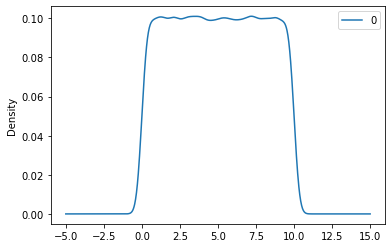

In [109]:
import scipy.stats as stats
import pandas as pd

uniform_data = stats.uniform.rvs(size=100000,
                 loc=0, #from 0
                 scale=10 #to 10
                 )

pd.DataFrame(uniform_data).plot(kind='density')

We get this graph. We can see that between 0 and 10, every number is equally likely to occur but outside it, the probability of every number is 0.

We can draw further insights from this distribution. If we want to find the probability that an observation drawn from this distribution falls below a specific values, we can do that using cdf. It gives area under this density curve up to a certain value on the x axis. Say we draw the cutoff at 5 and want to know area under that curve up to x=5 i.e

In [110]:
# using cdf on uniform distribution
stats.uniform.cdf(x=5.0, #cutoff
                 loc=0,
                 scale=10)

0.5

This will give the output of 0.5 which means that in this particular uniform distribution, if we pick out an observation, there is a 50% chance that it would be between 0 and 5.

The inverse of cdf is ppf. Given the probability, ppf gives the cutoff on the x axis. For example, to get the cutoff value for which we have 30% chance of drawing an observation below that value

In [111]:
stats.uniform.ppf(q=0.3, #probability cutoff
                 loc=0, #distribution start
                 scale=10) #distribution end

3.0

This will result in the value 3. So at x axis value of 3, we can slice the distribution so that 30% of it is to the left of the graph.

To get the actual probability density at given value x, we use pdf. This will basically give the value of the height of the distribution at that value x. Since uniform distribution is flat, in our case above, all x values between 0 and 10 will have the same probability density. And all points outside of this range would have probability density = 0.
Now, to get random numbers from any uniform distribution, we can use:

In [112]:
np.random.uniform()

0.1967468472170517

To get random numbers form the uniform distribution used above, use:

In [113]:
np.random.uniform(0 #low limit
                  ,10 #upper limit
                  ,(3,4)) #size
# This would result in an array like:


array([[8.98793389, 4.45928689, 6.20462917, 6.65114907],
       [8.98087544, 5.91319149, 6.94850059, 2.51790193],
       [4.26286416, 4.48275941, 8.22769552, 9.19842375]])

In [114]:
plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

In [ ]:
np.random.uniform(0 #low limit
                  ,10 #upper limit
                  ,(3,4)) #size
# This would result in an array like:


## Normal/Gaussian Distribution

Same as above, we can use SciPy, norm and rvs to generate this distribution

In [ ]:
from scipy.stats import norm
stats.norm.rvs()

### normal distribution
We can use cdf to get area under the curve below a cutoff value on x axis. For example:

In [ ]:
print(stats.norm.cdf(x=0.4))

In [ ]:
Similary, we can use ppf to get the cutoff on x axis for a certain probability (% from area under the curve). For example:

In [ ]:
#Find the quantile for the 97.5% cutoff

print(stats.norm.ppf(q=0.975))

Generating random numbers from some normal distribution can be done in multiple ways.

If we want to generate random numbers from a normal distribution of a particular mean and standard deviation:

In [ ]:
np.random.normal(1 #mean
                 ,2 #standard deviation
                 ,(3,2)) #size

If we want to generate random numbers from a normal distribution between 0 and 1

In [ ]:
np.random.rand(3,2)

If we want to generate random numbers from a standard normal distribution

In [ ]:
np.random.randn(3,2)

### Binomial Distribution
This is a discrete probability distribution. It has only 2 possible outcomes in experiments. We can use the binomial distribution to find probability of success. It tells you how likely it is to get success in n number of trials. So x axis would be the number of successes in a trial and y axis would be the number of trials. We need 2 parameters to define binomial distribution — probability of success in a trial and number of trials. A trial could have multiple events. For example — flipping fair coin 10 times = 1 trial.

In [ ]:
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.5 #probability of success (say getting heads)
         )
print(pd.crosstab(index="counts",columns=coin))

This shows that out of all the 10000 trials, it was only 10 times that we flipped the coin and got NO head. This makes sense because it is a fair coin with equal probability of getting a head or a tail. We can see that 2442 times, we got 5 heads. And only 10 times out of the 10000, did all 10 flips give a head.

In [ ]:
pd.DataFrame(coin).hist()

fair coin flips
If we now flip an unfair coin with 80% chance for heads, the graph should become right skewed because we would have more results of getting heads.

In [ ]:
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.8 #probability of success
         )

print(pd.crosstab(index="counts",columns=coin))

It is interesting to note that since this coin is biased to get heads, out of 10000 trials, there was not a single one where we got only 1 head in a trial. The least we got was 2 heads in a trial and that also happened just once. We can clearly see a bias of getting more heads in trials for this case.

In [ ]:
pd.DataFrame(coin).hist()

biased coin flips
Same as other distributions cdf gives the probability of successes within a certain range. For example, if we want to find out what is the probability of getting heads in 5 flips or less in the biased coin case:

In [ ]:
stats.binom.cdf(k=5, #probability of 5 success or less
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

Probability of MORE than 5 successes would then be:

In [ ]:
1-stats.binom.cdf(k=5, #probability of 5 success or less
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

In discrete distributions like this one, we have pmf instead of pdf. pmf stands for probability mass function. It is the proportion of observations at a given number of success k.

In [ ]:
stats.binom.pmf(k=5, #probability of 5 success 
               n=10, #with 10 flips
               p=0.5) #success probability 0.5

We can generate random numbers from a particular binomial distribution by giving the parameters n (number of trials) and p (probability of success). For example:

In [ ]:
np.random.binomial(n=52, p=0.7, size=(2,3))

### Geometric Distribution
This is also a discrete distribution. It models the amount of time it takes for an event to occur. For example, if success = heads, how many trials does it take to get success when flipping a fair coin?

In [ ]:
heads = stats.geom.rvs(size = 10000, #We generate 10000 trails of flips
                      p=0.5) #fair coin

print(pd.crosstab(index="counts", columns = heads))

In [ ]:
heads = stats.geom.rvs(size = 10000, #We generate 10000 trails of flips
                      p=0.5) #fair coin

print(pd.crosstab(index="counts", columns = heads))

In the crosstab we can see, half of the time, it takes only 1 flip to get a head. That makes sense as we are flipping a fair coin. So the graph would also be right skewed.

In [ ]:
pd.DataFrame(heads).hist()

### geometric distribution
We can use cdf to draw more insight. For example, what is the probability of success in first 3 flips?

In [ ]:
three_flip = stats.geom.cdf(k=3,
                           p=0.5)
print(three_flip)

What is the probability that we get success in exactly 2 flips? This can be solved using pmf.

In [ ]:
stats.geom.pmf(k=2,
              p=0.5)

### Exponential Distribution
This is the continuous version of the geometric distribution. It models the amount of time it takes for a certain event to occur, given an occurrence rate.
For example, if occurrence rate is once per hour, what is the probability of waiting for more than an hour for an event to occur?

In [ ]:
prob = stats.expon.cdf(x=1,
                      scale=1) #arrival rate
1-prob

### Poisson Distribution
It models the probability of success/event occurrence within a given time interval. For example, if a waiting room has an arrival rate of once per hour, how many arrivals happen in an hour?

In [ ]:
arr = stats.poisson.rvs(size=10000,
                       mu=1) #average arrival time 1

print(pd.crosstab(index='counts', columns = arr))

It it interesting to see that we often see 0 arrivals in an hour when the arrival rate is once per hour. We also see more arrivals sometimes. These are probably the busier hours.

In [ ]:
pd.DataFrame(arr).hist()

So in such a case, we would want to have say more chairs in the waiting room for these busy hours. Arrival rate of once per hour can be deceptive in such cases and we can run into shortage of resources.

With statistical distributions, we get a lot more insight into out data and business for which we are doing this sort of modeling.

# Data Transformation

Once we selected or filtered our data we want to transform it somehow. The best way to do this is with methods inherited to DataFrames or numpy universal funcs, that transform entire column of data element-wise. Examples would be pandas’ .floordiv() function (from documentation:
‘Integer division of dataframe and other, element-wise’) or numpy’s .floor_divide() (doc: ‘Return the largest integer smaller or equal to the division of the inputs.’).

If those functions were not available we could write our own and use it with .apply() method.

In [115]:
def some_func(x):
    return x * 2

df.apply(some_func)  # update each entry of a DataFrame without any loops

# lambda also works
df.apply(lambda n: n*2)  # the same

,ID,PID,Game,Study,Game_group,Condition,Condition_params,Resolution,Framerate,Bitrate,VQ,VF,VU,VD,AC,Age,Gender,Expertise,Monitor
0,2,2,Game1Game1,2,Game1_Game2_Game3Game1_Game2_Game3,2,480_30_300480_30_300,960,60,600,2.8,2.6,3.2,11.4,0,42,MaleMale,8,DesktopDesktop
1,4,2,Game2Game2,2,Game1_Game2_Game3Game1_Game2_Game3,4,480_30_300480_30_300,960,60,600,2.8,3.2,9.8,11.2,0,42,MaleMale,8,DesktopDesktop
2,6,2,Game3Game3,2,Game1_Game2_Game3Game1_Game2_Game3,6,480_30_300480_30_300,960,60,600,2.2,3.2,5.2,10.4,0,42,MaleMale,8,DesktopDesktop
3,8,2,Game2Game2,2,Game1_Game2_Game3Game1_Game2_Game3,8,480_30_1000480_30_1000,960,60,2000,6.4,6.8,9.0,10.8,0,42,MaleMale,8,DesktopDesktop
4,10,2,Game3Game3,2,Game1_Game2_Game3Game1_Game2_Game3,10,480_30_1000480_30_1000,960,60,2000,6.2,5.6,5.8,11.8,0,42,MaleMale,8,DesktopDesktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,6616,92,Game5Game5,4,Game4_Game5_Game6Game4_Game5_Game6,136,1080_60_60001080_60_6000,2160,120,12000,10.2,9.2,7.4,10.2,2,48,MaleMale,6,largePhonelargePhone
3308,6618,92,Game6Game6,4,Game4_Game5_Game6Game4_Game5_Game6,138,1080_60_60001080_60_6000,2160,120,12000,9.2,7.2,9.0,10.6,2,48,MaleMale,6,largePhonelargePhone
3309,6620,92,Game4Game4,4,Game4_Game5_Game6Game4_Game5_Game6,140,1080_60_500001080_60_50000,2160,120,100000,10.6,11.2,10.2,10.8,2,48,MaleMale,6,largePhonelargePhone
3310,6622,92,Game5Game5,4,Game4_Game5_Game6Game4_Game5_Game6,142,1080_60_500001080_60_50000,2160,120,100000,10.2,10.8,9.6,11.2,2,48,MaleMale,6,largePhonelargePhone


These functions do not return transformations, so we have to store it explicitly:

In [117]:
df['new_col'] = df['Resolution'].apply(lambda n: n*2)
df.head()

,ID,PID,Game,Study,Game_group,Condition,Condition_params,Resolution,Framerate,Bitrate,VQ,VF,VU,VD,AC,Age,Gender,Expertise,Monitor,new_col
0,1,1,Game1,1,Game1_Game2_Game3,1,480_30_300,480,30,300,1.4,1.3,1.6,5.7,0,21,Male,4,Desktop,960
1,2,1,Game2,1,Game1_Game2_Game3,2,480_30_300,480,30,300,1.4,1.6,4.9,5.6,0,21,Male,4,Desktop,960
2,3,1,Game3,1,Game1_Game2_Game3,3,480_30_300,480,30,300,1.1,1.6,2.6,5.2,0,21,Male,4,Desktop,960
3,4,1,Game2,1,Game1_Game2_Game3,4,480_30_1000,480,30,1000,3.2,3.4,4.5,5.4,0,21,Male,4,Desktop,960
4,5,1,Game3,1,Game1_Game2_Game3,5,480_30_1000,480,30,1000,3.1,2.8,2.9,5.9,0,21,Male,4,Desktop,960


If index is a string it has a .str accessor that allows us to modify entire index at once:

In [123]:
str(df.index).upper()

'RANGEINDEX(START=0, STOP=3312, STEP=1)'

Arithmetic operations on Series and DataFrames work directly. The expression below will create a new column where each value with index n is a sum of values with index n from ‘col3’ and ‘col7’.

In [128]:
df['VQ_+_Vf'] = df['VQ'] + df['VF'] 
df.head()

,ID,PID,Game,Study,Game_group,Condition,Condition_params,Resolution,Framerate,Bitrate,...,VF,VU,VD,AC,Age,Gender,Expertise,Monitor,new_col,VQ_+_Vf
0,1,1,Game1,1,Game1_Game2_Game3,1,480_30_300,480,30,300,...,1.3,1.6,5.7,0,21,Male,4,Desktop,960,2.7
1,2,1,Game2,1,Game1_Game2_Game3,2,480_30_300,480,30,300,...,1.6,4.9,5.6,0,21,Male,4,Desktop,960,3.0
2,3,1,Game3,1,Game1_Game2_Game3,3,480_30_300,480,30,300,...,1.6,2.6,5.2,0,21,Male,4,Desktop,960,2.7
3,4,1,Game2,1,Game1_Game2_Game3,4,480_30_1000,480,30,1000,...,3.4,4.5,5.4,0,21,Male,4,Desktop,960,6.6
4,5,1,Game3,1,Game1_Game2_Game3,5,480_30_1000,480,30,1000,...,2.8,2.9,5.9,0,21,Male,4,Desktop,960,5.9


# Missing Data and it's Handling

In [131]:
df.isnull().sum()

ID                  0
PID                 0
Game                0
Study               0
Game_group          0
Condition           0
Condition_params    0
Resolution          0
Framerate           0
Bitrate             0
VQ                  0
VF                  0
VU                  0
VD                  0
AC                  0
Age                 0
Gender              0
Expertise           0
Monitor             0
new_col             0
VQ_+_Vf             0
dtype: int64

We don't have missing values in our dataset so we'll use another for this purpose.

### Missing Data & it's Handling 

In [ ]:
# Pre-requisite
# ---
# Importing pandas library
# ---
# OUR CODE GOES BELOW
# 
import pandas as pd

In [132]:
# --- 
# Finding records with missing data
# ---
# Dataset url = http://bit.ly/SampleDataset
# ---
# OUR CODE GOES BELOW
# 

# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/SampleDataset') 

# Previewing our dataset
# ---
# 
df.head()

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000


In [135]:
###### We can check if there is any missing values in the entire dataframe as shown
# Let's uncomment the following line
# NB: This method may not be the most convenient. Why?
# ---
# 
df.isnull()

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False


In [136]:
# We can also check for missing values in each column 
# NB: This method may not be the most convenient. Why?
# Let's uncomment the following line
# ---
# 
df.isnull().any()

NAME             False
CITY             False
COUNTRY          False
HEIGHT           False
WEIGHT            True
ACCOUNT A         True
ACCOUNT B        False
TOTAL ACCOUNT    False
dtype: bool

In [137]:
# We can check how many missing values there are across each variable/column by
# Let's uncomment the following line
# ---
# 
df.isnull().sum()

NAME             0
CITY             0
COUNTRY          0
HEIGHT           0
WEIGHT           1
ACCOUNT A        1
ACCOUNT B        0
TOTAL ACCOUNT    0
dtype: int64

In [138]:
# We can also check to see if we have any missing values in the dataframe by
# Let's uncomment the following line
# ---
# 
df.isnull().values.any()

True

In [139]:
# Lastly, We can also get a total count of missing values by
# Let's uncomment the following line
#
# ---
df.isnull().sum().sum()

2

In [140]:
# Dealing with the missing data
# ---
# 

# We can drop rows where all cells in that row is NA
# Let's uncomment the following line
# NB: We don't have these rows in our dataset 
# ---
#
df_cleaned = df.dropna(how='all')
df_cleaned

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


In [141]:
df_cleaned_1=df.dropna(how='any')

df_cleaned_1

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949


In [142]:
df_cleaned_1.index

Int64Index([0, 1, 3, 4, 5, 6], dtype='int64')

In [143]:
import numpy as np
df_cleaned_1.index=np.arange(0,len(df_cleaned_1))

In [144]:
df_cleaned_1.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [145]:
# We can also drop columns if they only contain missing values
# Let's uncomment the following line
# NB: We don't have these rows in our dataset 
# ---
# 
df_without_columns = df.dropna(axis=1, how='all')

In [146]:
df_without_columns

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


In [147]:
# We can drop rows that contain less than five observations
# NB: We don't have these rows in our dataset 
# ---
df = pd.read_csv('http://bit.ly/SampleDataset') 
# thresh : int, optional
    # Require that many non-NA values.
t8=df.dropna(thresh=8)
t8

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949


In [148]:
# We can also fill in missing data with zeros
# Let's uncomment the following line 
# ---
# 
df2 = df.copy()
df3 = df2.fillna(0)
df3

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,0.0,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,0.0,4500.0,2300,6800


Filling missing values

1 - ffill (propagate last valid observation forward to next valid)

2-  bfill (Use next valid observation to fill gap.)

In [154]:
# ffill
df2.fillna(method="ffill")

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,4500.0,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,117.0,4500.0,2300,6800


In [155]:
# bfill
df2.fillna(method='bfill')

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,4344.0,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


In [149]:
# Lastly, we can also drop the missing observations
# Let's uncomment the following two lines
# ---
#
df_no_missing = df.dropna()
df_no_missing

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949


# Outliers detection and handling

In [169]:
# Pre-requisite 1
# ---
# Importing pandas library
# ---
# OUR CODE GOES BELOW
# 
import pandas as pd

In [170]:
# Pre-requisite 2
# ---
# Importing the seaborn library
# This is a visualisation library
# ---
# 
import seaborn as sns

## Finding outliers

 We can check for outliers with a box plot


In [171]:
# Dataset url = http://bit.ly/CountryDataset1
# ---
# OUR CODE GOES BELOW
#  

# Let's read data from url as dataframe
# 
outliers_df = pd.read_csv("http://bit.ly/CountryDataset1") 

# Lets preview our our dataframe below
#
outliers_df[outliers_df['year']==2007]

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.5803384
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.32,12779.37964
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


In [172]:
# Then we will work with only data for the year 2007
# Let's uncomment the line below 
# ---
# 
outliers_df_2007 = outliers_df[outliers_df['year']==2007] 
outliers_df_2007.head()

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.5803384
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.32,12779.37964


Text(0, 0.5, 'Life Expectancy')

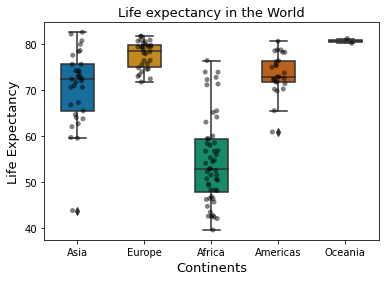

In [178]:
# We then specify from the multiple options to customize the boxplot with Seaborn.
# We then choose color palette scheme for the boxplot with Seaborn. 
# Here, we chose colorblind friendly palette “colorblind”. 
# Other color palette options available include deep, muted, bright, pastel, and dark.
# # The dots in the plot are outliers .
# Let's uncomment the line below 
# ---
#
bplot = sns.boxplot(y='lifeExp', x='continent', data = outliers_df_2007, width=0.5, palette="colorblind")

# Boxplot alone is extremely useful in getting the summary of data within and between groups. 
# However, often, it is a good practice to overlay the actual data points on the boxplot.
# We use jitter = True option to spread the data points horizontally and also 
# make boxplot with data points using stripplot.
# Let's uncomment the line below 
# ---
#
bplot = sns.stripplot(y='lifeExp', x='continent',  data = outliers_df_2007, jitter=True, marker='o', alpha=0.5, color='black')

# Naming and sizing our graph and axis
# Let's uncomment the 3 lines below 
# ---
#
bplot.axes.set_title("Life expectancy in the World", fontsize=13)
bplot.set_xlabel("Continents", fontsize=13)
bplot.set_ylabel("Life Expectancy", fontsize=13)

In [175]:
##### <font color="blue">Example 2</font>

outliers_df.shape

(1704, 6)

In [179]:
# Example 2
# ---
# Dealing with Outliers using the Interquantile range
# ---
# 
 
# There are many ways of dealing with the outliers however in this session we wiil 
# use the interquartile range (IQR). This is the first quartile subtracted from the third quartile, 
# i.e. the range covered by the middle 50% of the data; 
# The first and third quartile can be clearly seen on a box plot on the data above. 
# It is a measure of the dispersion similar to standard deviation or variance, 
# but is much more robust against outliers. Now, calculating IQR for each column.
# 

Q1 = outliers_df.quantile(0.25)
Q3 = outliers_df.quantile(0.75)
IQR = Q3 - Q1
IQR

# We now filter out outliers by keeping only valid values.
# Let's uncomment the lines below
# ---
#
outliers_df_iqr = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_df_iqr.shape

# Checking the size of the dataset with outliers for cleaning purposes
# ---
#
# outliers_df.shape

(1387, 6)

In [180]:
#  outliers in the given dataset.
# ---
# Dataset url = http://bit.ly/SampleDataset
# ---
# OUR CODE GOES BELOW
outliers_df=pd.read_csv('http://bit.ly/SampleDataset')
print(outliers_df.shape)
# bplot = sns.boxplot(data =df, width=0.5, palette="colorblind")
outliers_df

(8, 8)


,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


### defining quantile

In [184]:
Q1=outliers_df.quantile(0.25)
Q3=outliers_df.quantile(0.75)
IQR=Q3-Q1
IQR

HEIGHT            10.25
WEIGHT             29.5
ACCOUNT A         855.0
ACCOUNT B        7244.5
TOTAL ACCOUNT   7301.75
dtype: float64

#### Determining how many outliers there are in our dataset

In [185]:
outlier_df_iqr = outliers_df[((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier_df_iqr.shape

(3, 8)

### Displaying our outliers

In [187]:
outliers_df[((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000


In [188]:
# Deal with the outliers in the given dataset.
# ---
# Dataset url = http://bit.ly/SampleDataset
# ---
# OUR CODE GOES BELOW
print(df.shape)

(3312, 19)


## Dropping the outliers

In [190]:
clean_df = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df.shape

clean_df

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


<AxesSubplot:>

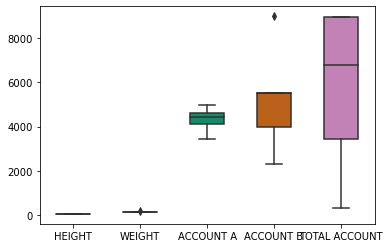

In [191]:
sns.boxplot(data=clean_df,width=0.5,palette='colorblind')